In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Average (Mean) ##

In [3]:
values = make_array(2, 3, 3, 9)

In [4]:
sum(values)/len(values)

4.25

In [5]:
np.average(values)

4.25

In [6]:
np.mean(values)

4.25

In [7]:
(2 + 3 + 3 + 9)/4

4.25

In [8]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

## Mean vs Median

In [43]:
#The mean is preferred for symmetric distributions with no outliers. This is because the mean is a sensitive statistic to the presence of outliers
#The median is the winner if the distribution is skewed with the presence of an outlier, because it is a robust/resistant statistic

In [9]:
top_values = make_array(1, 2, 2, 3, 3, 3, 4, 4, 10)
bottom_values = make_array(1, 2, 2, 3, 3, 3, 4, 4, 5)

values_table = Table().with_columns(
    'top_values', top_values,
    'bottom_values', bottom_values
)

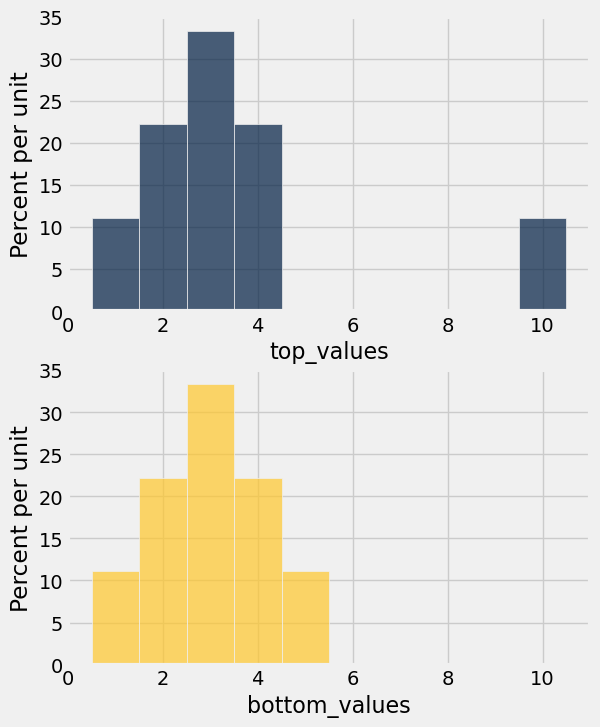

In [10]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist('top_values', 'bottom_values', bins = bins_for_display, overlay = False)

In [ ]:
#If the mean and median are close to one another this may tell us the data is symmetric 
#If the mean is bigger than the median, than it is right-skewed
#If the mean is lower the the median, than it is left-skewed

In [11]:
np.mean(top_values), np.median(top_values)

(3.5555555555555554, 3.0)

In [12]:
np.mean(bottom_values), np.median(bottom_values)

(3.0, 3.0)

## Defining Variability

In [13]:
bottom_values_table = Table().with_columns(
    'bottom values', bottom_values,
    'mean of bottom values', np.repeat(np.mean(bottom_values), len(bottom_values)),
    'deviation from mean', bottom_values - np.mean(bottom_values)
)

bottom_values_table

bottom values,mean of bottom values,deviation from mean
1,3,-2
2,3,-1
2,3,-1
3,3,0
3,3,0
3,3,0
4,3,1
4,3,1
5,3,2


In [14]:
sum(bottom_values_table.column('deviation from mean')) / bottom_values_table.num_rows

0.0

In [15]:
sum((bottom_values_table.column('deviation from mean')) ** 2 ) / bottom_values_table.num_rows

1.3333333333333333

In [16]:
(sum((bottom_values_table.column('deviation from mean')) ** 2 ) / bottom_values_table.num_rows) ** 0.5

1.1547005383792515

In [17]:
np.std(bottom_values)

1.1547005383792515

In [18]:
np.std(top_values)

2.4545246704860579

## Chebyshev's Bound

In [ ]:
#Chebyshevs Bound: for any distribution, approximately 1-(1/k^2) (k>2) of all datat values lie within k standard deviations of the mean
# 1-(1/k^2) represents a lower bound for the proportion of data values that lie in this given range

In [3]:
births = Table.read_table('baby.csv').drop('Maternal Smoker')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
120,284,27,62,100
113,282,33,64,135
128,279,28,64,115


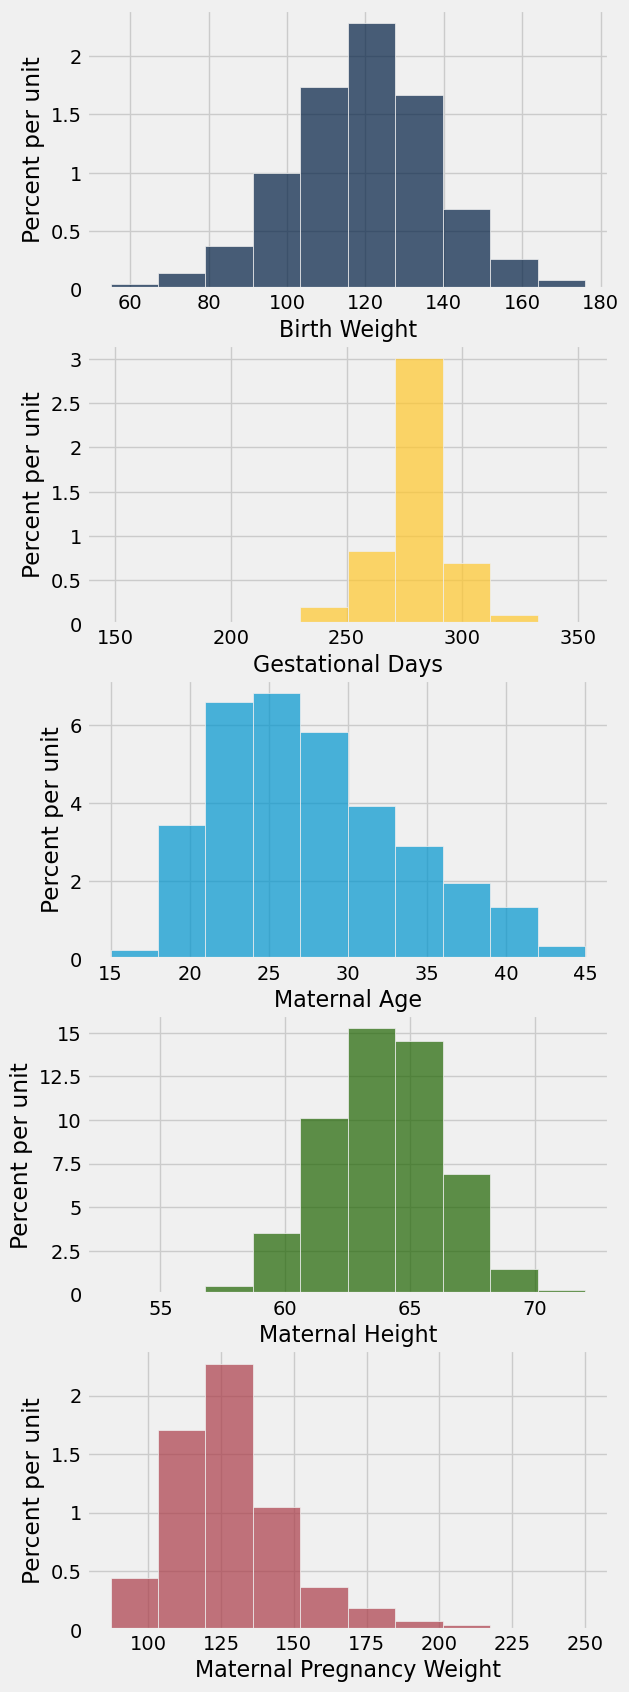

In [21]:
births.hist(overlay = False)

In [22]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280411)

In [23]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [24]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [25]:
# Chebyshev's bound: 
# The proportion we calculated above should be at least

1 - 1/(3**2)

0.8888888888888888

In [26]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

In [27]:
# See if Chebyshev's bounds work for distributions with various shapes

for variable in births.labels:
    values = births.column(variable)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(variable)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(variable, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

## Standard Units ##

In [28]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [29]:
ages = births.column('Maternal Age')

In [30]:
ages_standard_units = standard_units(ages)

In [31]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.8153604041908968)

In [32]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [33]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [34]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.8153604041908968)

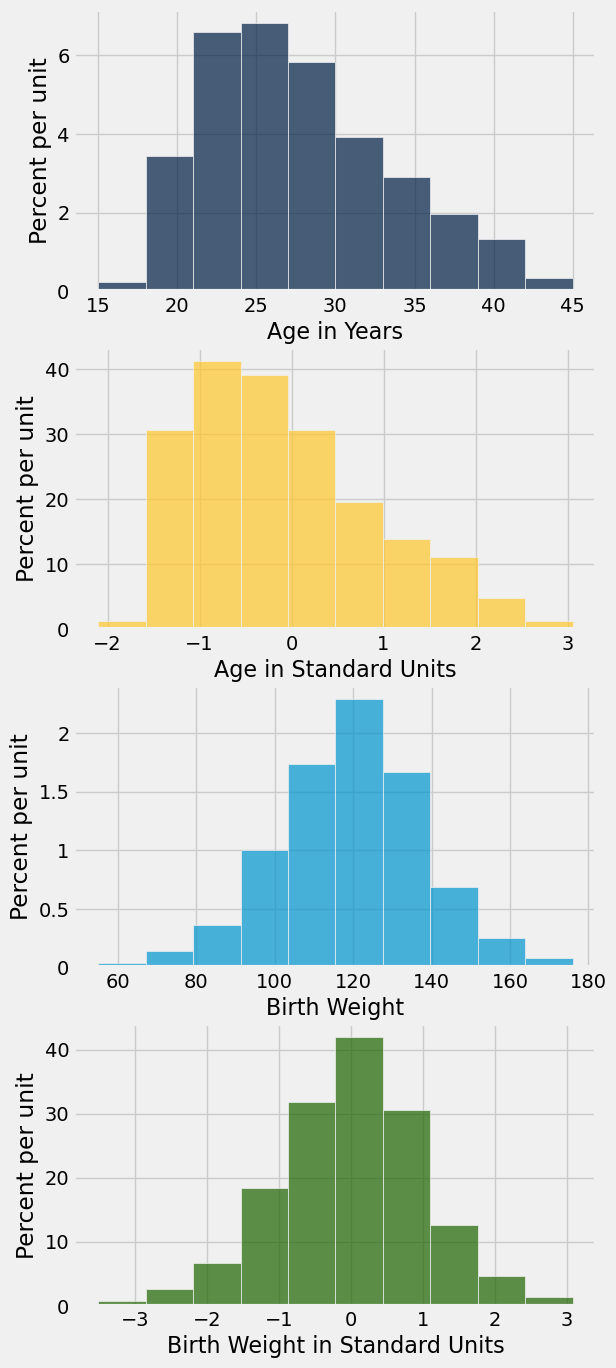

In [36]:
both.hist(overlay = False)

In [37]:
both = both.with_columns(
    'Birth Weight', births.column('Birth Weight'),
    'Birth Weight in Standard Units', standard_units(births.column('Birth Weight'))
)

both

Age in Years,Age in Standard Units,Birth Weight,Birth Weight in Standard Units
27,-0.0392546,120,0.029337
33,0.992496,113,-0.352741
28,0.132704,128,0.465998
23,-0.727088,108,-0.625654
25,-0.383171,136,0.902658
33,0.992496,138,1.01182
23,-0.727088,132,0.684328
25,-0.383171,120,0.029337
30,0.476621,143,1.28474
27,-0.0392546,140,1.12099


In [38]:
both.sort('Birth Weight')

Age in Years,Age in Standard Units,Birth Weight,Birth Weight in Standard Units
35,1.33641,55,-3.51853
34,1.16445,58,-3.35478
24,-0.55513,62,-3.13645
24,-0.55513,63,-3.08187
31,0.648579,65,-2.9727
24,-0.55513,65,-2.9727
32,0.820537,68,-2.80896
31,0.648579,69,-2.75437
32,0.820537,71,-2.64521
32,0.820537,71,-2.64521


## The SD and Bell Shaped Curves

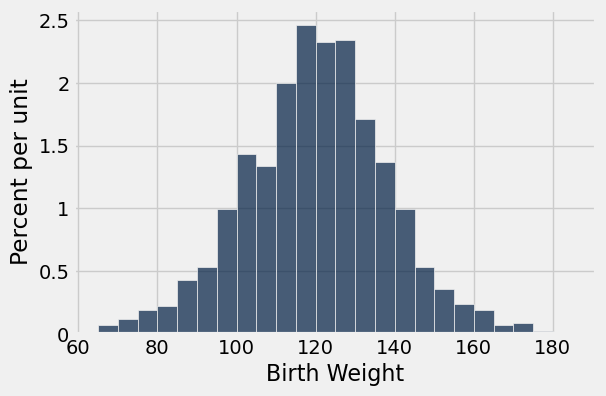

In [39]:
births.hist('Birth Weight', bins = np.arange(65, 190, 5))

In [40]:
birth_weights = births.column('Birth Weight')
np.mean(birth_weights), np.std(birth_weights)

(119.46252129471891, 18.320863702202779)

In [6]:
np.mean(births.take(np.arange(10)).column('Birth Weight') < 140)

0.80000000000000004